In [ ]:
import pickle
import numpy as np

# Path to your .p file
file_path = "/Users/haydenoutlaw/Documents/Research/opnet/deep-operator-networks/data/subsampled21_database_1DBurgers_nmu441_nt200_nx201_tstop2_aw1.p"

# Load .p file
with open(file_path, "rb") as f:
    DATA = pickle.load(f)

params = DATA["param"]      # (N, 2)
data_list = DATA["data"]    # list of N dicts

# Build structured samples: just params + solution
samples = []
for p, d in zip(params, data_list):
    samples.append({
        "params": np.array(p, dtype=np.float32),      # (2,)
        "solution": np.array(d["x"], dtype=np.float32) # (nt, nx)
    })

# Extract grids (assume same across all samples)
t_grid = np.array(data_list[0]["t"], dtype=np.float32).flatten()  # (nt,)
x_grid = np.linspace(-3, 3, data_list[0]["x"].shape[1], dtype=np.float32)  # (nx,)

# Save everything in one .npz archive (more natural than .npy for multiple arrays)
out_path = "burgers_dataset.npz"
# np.savez(
#     out_path,
#     samples=np.array(samples, dtype=object),  # list of dicts
#     t=t_grid,
#     x=x_grid
# )

#print(f"Saved {out_path} with {len(samples)} samples")


Saved burgers_dataset.npz with 441 samples


In [7]:
param, sol = np.array(samples)[0]['params'], np.array(samples)[0]['solution']

sol.shape

(201, 201)

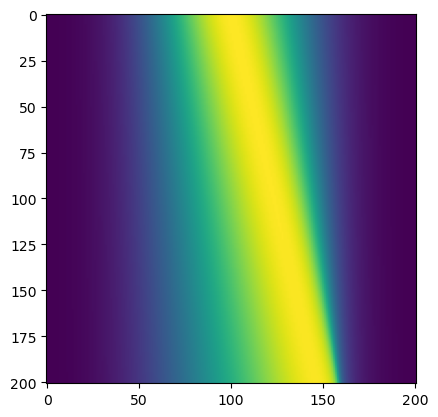

In [9]:
import matplotlib.pyplot as plt
plt.imshow(sol)

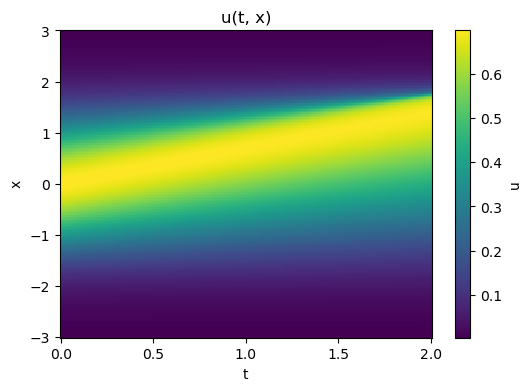

In [ ]:
T, X = np.meshgrid(t_grid, x_grid, indexing="ij")   # match sol[t,x]

plt.figure(figsize=(6,4))
plt.pcolormesh(T, X, sol, shading='auto', cmap='viridis')
plt.xlabel("t")
plt.ylabel("x")
plt.title("u(t, x)")
plt.colorbar(label="u")
plt.show()
